In [9]:
import numpy as np #maejo de arreglos algebra lineal
import pandas as pd #manejo dataframes tipo datos
import matplotlib.pyplot as plt #graficas
import seaborn as sns #graficas estadísticAS historioigramsa

In [10]:
## Publicar los datos en la web
url = 'https://docs.google.com/spreadsheets/d/1VLCIafxLq2BUfRE7SSChQHDyRRSIdywLjSAgm65OQUE/pub?output=csv'

hcalculo = pd.read_csv(url)
hcalculo.head(10)

,Name,OVR,PAC,SHO,PAS,DRI,DEF,PHY,Acceleration,Sprint Speed,...,Skill moves,Age,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Preferred foot,Nation,Position
0,Kylian Mbappé,91,97,90,80,92,36,78,97,97,...,5,25,NaN,NaN,NaN,NaN,NaN,Right,France,ST
1,Rodri,91,66,80,86,84,87,85,65,66,...,3,28,NaN,NaN,NaN,NaN,NaN,Right,Spain,CDM
2,Erling Haaland,91,88,92,70,81,45,88,80,94,...,3,24,NaN,NaN,NaN,NaN,NaN,Left,Norway,ST
3,Jude Bellingham,90,80,87,83,88,78,83,81,80,...,4,21,NaN,NaN,NaN,NaN,NaN,Right,England,CAM
4,Vini Jr.,90,95,84,81,91,29,69,95,95,...,5,24,NaN,NaN,NaN,NaN,NaN,Right,Brazil,LW
5,Kevin De Bruyne,90,67,87,94,87,65,78,67,67,...,4,33,NaN,NaN,NaN,NaN,NaN,Right,Belgium,CM
6,Harry Kane,90,65,93,84,83,49,82,64,66,...,3,31,NaN,NaN,NaN,NaN,NaN,Right,England,ST
7,Martin Ødegaard,89,70,82,89,89,67,66,72,69,...,5,25,NaN,NaN,NaN,NaN,NaN,Left,Norway,CM
8,Gianluigi Donnarumma,89,90,84,73,90,52,87,50,55,...,1,25,90.0,84.0,73.0,87.0,90.0,Right,Italy,GK
9,Alisson,89,86,85,85,89,56,90,60,49,...,1,31,86.0,85.0,85.0,90.0,89.0,Right,Brazil,GK


In [11]:
# Ahora extraeremos los datos
x = hcalculo.iloc[:,1:-1].values # "":"" = de todas las filas , 1 = la segunda: -1 = hasta la penultima. "":"" no incluye -1
y = hcalculo.iloc[:,-1].values # "":"" = de todas las columnas, -1 = hasta la última
y

array(['ST', 'CDM', 'ST', ..., 'RB', 'CM', 'CDM'], dtype=object)

In [12]:
datframe = pd.DataFrame(x) # Crear un dataframe a partir de pandas
for col in datframe.columns:
  datframe[col] = pd.to_numeric(datframe[col], errors = "coerce") #cambiar cada columna por un valor numérico


In [13]:
x = datframe.values

In [14]:
#Crear in imputador
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy = "median")#Reemplazar los valores nulos con ayuda de la mediana
imputer.fit(x)
x = imputer.transform(x)

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: [44 45]. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


In [15]:
x_ = x[:,:-1] ## Eligiendo todos los datos excepto ka racnianalidad
x_

array([[91., 97., 90., ..., 63., 62., 64.],
       [91., 66., 80., ..., 63., 62., 64.],
       [91., 88., 92., ..., 63., 62., 64.],
       ...,
       [47., 57., 47., ..., 63., 62., 64.],
       [47., 66., 35., ..., 63., 62., 64.],
       [47., 56., 34., ..., 63., 62., 64.]])

In [16]:
from sklearn.decomposition import PCA
#Crear un objeto PCA (Principal Component Analysis) y ajustar los datos
pca = PCA(n_components=3) #Queremos las tres primeras componentes principales
x_pca = pca.fit_transform(x_)

In [17]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42) #se crea un objeto kmeans con las propiedades del algoritmo
clusters = kmeans.fit_predict(x_) # Asingando los datos y otorgandoles etiquetas (4, por número de clusters)
##Investigar método del codo

In [19]:
# Ver centroides
centroides_kmeans = kmeans.cluster_centers_
centroides_kmeans

array([[63.3631424 , 62.27552638, 36.21371972, 49.66900611, 53.74349106,
        61.500566  , 67.22503962, 61.51573466, 62.8637084 , 40.33710663,
        32.49196287, 46.23590672, 33.74100068, 31.48766131, 39.64500792,
        44.30088295, 44.19945664, 33.52411139, 58.32125877, 52.86755717,
        38.54652479, 50.19492868, 57.182024  , 59.182024  , 59.35793525,
        55.87887707, 54.42925062, 60.95766357, 58.89359294, 60.82408875,
        63.31129726, 61.2841295 , 67.70636178, 64.91034639, 69.90378085,
        63.16096898,  2.77586597,  2.04980756, 24.93321259, 65.        ,
        63.        , 62.        , 64.        ],
       [69.71474786, 69.68924833, 58.79181732, 65.67021884, 68.71988582,
        62.64985728, 68.5963844 , 70.2188392 , 69.23311132, 62.88563273,
        56.14500476, 65.56479543, 59.88106565, 51.10352046, 54.16441484,
        65.24129401, 62.73853473, 54.85594672, 69.55756422, 65.9320647 ,
        61.35908658, 67.8114177 , 71.32407231, 71.49324453, 67.19657469,
   

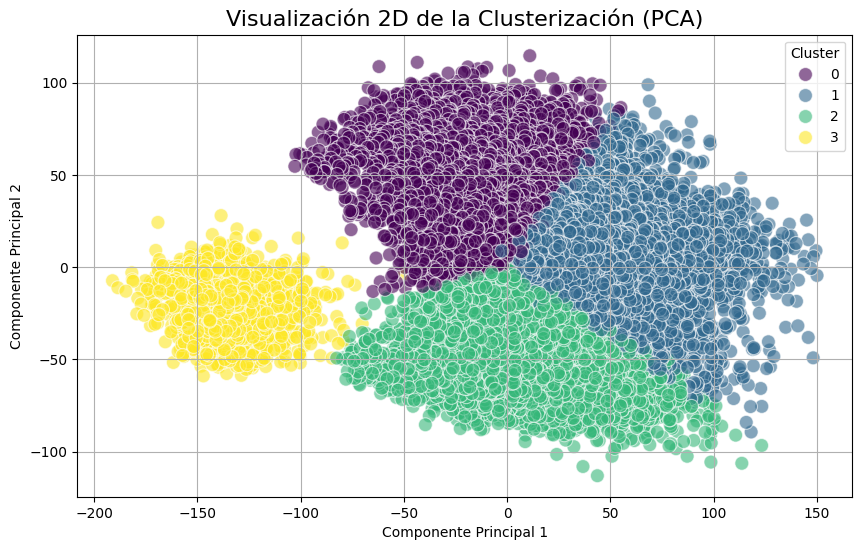

In [21]:
#crear un gráfico de dispersión 2D usando las dos primeras componentes
plt.figure(figsize=(10,6))
sns.scatterplot(x = x_pca[:,0], y = x_pca[:,1], hue=clusters,
                palette='viridis', alpha=0.6, s=100)
plt.title('Visualización 2D de la Clusterización (PCA)', fontsize=16)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.legend(title='Cluster')
plt.show()